<a href="https://colab.research.google.com/github/ThatManRong/RL_Thesis/blob/Single-Asset/Jan19_w_7features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from scipy.io import loadmat
import math
import statistics
import os

dataDir = '/content/drive/My Drive/Colab Notebooks/AAL/'
mats = []
for file in os.listdir( dataDir ) :
    mats.append(loadmat( dataDir+file ) )

#master_file_midprice = [0 for i in range(len(mat[i])*len(mats))]

# count = 0
# for i in range(len(mats)):

#   lob = mats[i]['LOB']
#   SellPrice = lob['SellPrice']
#   BuyPrice = lob['BuyPrice']
#   for j in range(234000):
#     master_file_midprice[count+j] = (sum(SellPrice[0][0][j]) + sum(BuyPrice[0][0][j]))/(2*20)
#   count = count + 234000

In [3]:
import numpy as np
master_BuyPrice = []
master_SellPrice = []
master_NumberBuyOrder = []
master_NumberSellOrder = []
master_VolumeMO = []
master_BuyVolume = []
master_SellVolume = []
master_NumberMO = []
#master_time = []
for i in range(len(mats)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  master_BuyPrice.append(np.array(mats[i]['data']['BuyPrice'][0][0]))
  master_SellPrice.append(np.array(mats[i]['data']['SellPrice'][0][0]))
  master_NumberBuyOrder.append(np.array(mats[i]['data']['NumberMO'][0][0][0]))   #Buy order
  master_NumberSellOrder.append(np.array(mats[i]['data']['NumberMO'][0][0][1]))   #Sell order
  master_NumberMO.append(np.array(mats[i]['data']['NumberMO'][0][0]))
  master_VolumeMO.append(np.array(mats[i]['data']['VolumeMO'][0][0]))
  master_BuyVolume.append(np.array(mats[i]['data']['BuyVolume'][0][0]))
  master_SellVolume.append(np.array(mats[i]['data']['SellVolume'][0][0]))
#sellVolume = np.array(mats[i]['data']['SellVolume'][0][0])

In [4]:
def clear_master(master):
  result = master
  for i in range(len(master)):
    if len(master[i]) != 23400:
      print(len(master[i]))
      del result[i]
  return result

In [11]:
abc = clear_master(master_BuyPrice)
abc = clear_master(master_SellPrice)
abc = clear_master(master_NumberMO)
abc = clear_master(master_VolumeMO)
abc = clear_master(master_BuyVolume)
abc = clear_master(master_SellVolume)

In [12]:
def flatten_master(master, price_indicator):
  if price_indicator == True:
    result = []
    for i in range(len(master)):
      #print('Percent Done: ', i/len(master))
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append((master[i][j][0]-master[i][0][0])/10000)   #Price difference between spot price and price of the beginning. 
  if price_indicator == False:
    result = []
    for i in range(len(master)):
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append(master[i][j][0])
  return result

In [13]:
flattened_BuyPrice = flatten_master(clear_master(master_BuyPrice), price_indicator = True) 
flattened_SellPrice = flatten_master(master_SellPrice, price_indicator = True) 
flattened_NumberBuyOrder = flatten_master(clear_master(master_NumberMO), price_indicator = False) 
flattened_NumberBuyVolume = flatten_master(clear_master(master_BuyVolume), price_indicator = False) 
flattened_NumberSellVolume = flatten_master(clear_master(master_SellVolume), price_indicator = False) 

In [ ]:
print(len(master_BuyPrice))

In [14]:
timestamp = []
for i in range(len(clear_master(master_BuyPrice))):
  for j in range(len(master_BuyPrice[0])-1):
    timestamp.append(j)

In [ ]:
print(len(timestamp))
print(len(flattened_BuyPrice))
print(len(flattened_SellPrice))
print(len(flattened_NumberBuyOrder))
print(len(flattened_NumberBuyVolume))

In [15]:
flattened_MidPrice = []
for i in range(len(flattened_BuyPrice)):
  flattened_MidPrice.append(0.5*flattened_BuyPrice[i]+0.5*flattened_SellPrice[i])

flattened_AvgVolume = []
for i in range(len(flattened_NumberBuyVolume)):
  flattened_AvgVolume.append(0.5*flattened_NumberBuyVolume[i]+0.5*flattened_NumberSellVolume[i])

In [ ]:
print(len(flattened_AvgVolume))

In [17]:
import pandas as pd
data = {'Time': timestamp, 
        'BuyPrice': flattened_BuyPrice,
        'SellPrice' : flattened_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': flattened_NumberBuyVolume,
        'SellVolume': flattened_NumberSellVolume,
        'MidPrice': flattened_MidPrice,
        'AvgVolume': flattened_AvgVolume}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

          Time  BuyPrice  SellPrice  BuyVolume  SellVolume  MidPrice  AvgVolume
0            0      0.00       0.00        200         500     0.000      350.0
1            1      0.00      -0.01        100          14    -0.005       57.0
2            2      0.01      -0.01        100          14     0.000       57.0
3            3      0.00       0.23        100         230     0.115      165.0
4            4      0.05       0.23        100         230     0.140      165.0
...        ...       ...        ...        ...         ...       ...        ...
5802947  23394      0.03      -0.06       2200        4961    -0.015     3580.5
5802948  23395      0.03      -0.06        900        2620    -0.015     1760.0
5802949  23396      0.03      -0.06      12702        6066    -0.015     9384.0
5802950  23397      0.03      -0.06      19702        3705    -0.015    11703.5
5802951  23398      0.04      -0.05      29600        2122    -0.005    15861.0

[5802952 rows x 7 columns]


In [ ]:
def normalize_0_1(flattened):
  result = []
  max = np.max(flattened)
  min = np.min(flattened)
  for elem in flattened:
    result.append((elem - max)/(max-min))
  return result

def normalize_Z(flattened):
  result = []
  std = np.std(flattened)
  mean = np.mean(flattened)
  for elem in flattened:
    result.append((elem - mean)/std)
  return result

In [ ]:
normalized_BuyPrice = normalize_0_1(flattened_BuyPrice)
normalized_SellPrice = normalize_0_1(flattened_SellPrice)
normalized_BuyVolume = normalize_0_1(flattened_NumberBuyVolume)
normalized_SellVolume = normalize_0_1(flattened_NumberSellVolume)
normalized_MidPrice = normalize_0_1(flattened_MidPrice)

In [ ]:
import pandas as pd
normalized_data = {'Time': timestamp, 
        'BuyPrice': normalized_BuyPrice,
        'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': normalized_BuyVolume,
        'SellVolume': normalized_SellVolume,
        'MidPrice': normalized_MidPrice}
  
# Convert the dictionary into DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
print(normalized_data)

In [ ]:
normalized_BuyPrice = normalize_Z(flattened_BuyPrice)
normalized_SellPrice = normalize_Z(flattened_SellPrice)
normalized_BuyVolume = normalize_Z(flattened_NumberBuyVolume)
normalized_SellVolume = normalize_Z(flattened_NumberSellVolume)
normalized_MidPrice = normalize_Z(flattened_MidPrice)

In [ ]:
import pandas as pd
normalized_data = {'Time': timestamp, 
        # 'BuyPrice': normalized_BuyPrice,
        # 'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': normalized_BuyVolume,
        'SellVolume': normalized_SellVolume,
        'MidPrice': normalized_MidPrice}
  
# Convert the dictionary into DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
print(normalized_data)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(normalized_MidPrice, color = 'blue', edgecolor = 'black',
         bins = 20)

In [ ]:
split_ratio = 0.8 #80% as train set. 
split_point = int(251*0.8)*23400
train_data = normalized_data[:split_point]
test_data = normalized_data[split_point:]
len(train_data),len(test_data)

In [16]:
def reduce_outlier_effect(df):
  temp = df
  temp.loc[temp["BuyVolume"] > 3, "BuyVolume"] = 3.0
  temp.loc[temp["BuyVolume"] < -3, "BuyVolume"] = -3.0
  temp.loc[temp["SellVolume"] > 3, "SellVolume"] = 3.0
  temp.loc[temp["SellVolume"] < -3, "SellVolume"] = -3.0
  temp.loc[temp["MidPrice"] > 3, "MidPrice"] = 3.0
  temp.loc[temp["MidPrice"] < -3, "MidPrice"] = -3.0
  return temp

def split_into_days(df,timestamp):
  days = []
  record = 0
  for i in range(len(timestamp)-1):
    if timestamp[i]>timestamp[i+1]:
      days.append(df.iloc[record:i+1])
      record = i+1
  return days
      


In [ ]:
normalized_data = reduce_outlier_effect(normalized_data)
# normalized_data

In [ ]:
splitted_normalized_data = split_into_days(normalized_data,timestamp)

In [ ]:
print(len(splitted_normalized_data))

In [ ]:
print(list(splitted_normalized_data[0]['BuyVolume']))

#Pooling

Use average pooling to reduce length of time series. 

In [17]:
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  pooled_BuyVolume = []
  pooled_SellVolume = []
  pooled_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    pooled_BuyVolume.append(np.mean(list(df['BuyVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_SellVolume.append(np.mean(list(df['SellVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': pooled_BuyVolume,
        'SellVolume': pooled_SellVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

    

In [ ]:
something = pooling(splitted_normalized_data[0],10)

In [ ]:
pooled_splitted_normalized_data = []
for dataset in splitted_normalized_data:
  pooled_splitted_normalized_data.append(pooling(dataset,10))

#Data Processing (7 features)

In [18]:
import pandas as pd
data = {'Time': timestamp, 
        'BuyPrice': flattened_BuyPrice,
        'SellPrice' : flattened_SellPrice,
        'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': flattened_NumberBuyVolume,
        'SellVolume': flattened_NumberSellVolume,
        'MidPrice': flattened_MidPrice,
        'AvgVolume': flattened_AvgVolume}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  pooled_BuyPrice = []
  pooled_SellPrice = []
  pooled_NumberBuyOrder = []
  pooled_BuyVolume = []
  pooled_SellVolume = []
  pooled_MidPrice = []
  pooled_timestamp = []
  pooled_AvgVolume = []
  for i in range(int(len(temp)/pooling_factor)-1):
    pooled_BuyPrice.append(np.mean(list(df['BuyPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_SellPrice.append(np.mean(list(df['SellPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_NumberBuyOrder.append(np.mean(list(df['NumberBuyOrder'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_BuyVolume.append(np.mean(list(df['BuyVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_SellVolume.append(np.mean(list(df['SellVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    #pooled_AvgVolume.append(np.mean(list(df['AvgVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        'BuyPrice': pooled_BuyPrice,
        'SellPrice' : pooled_SellPrice,
        'NumberBuyOrder': pooled_NumberBuyOrder,
         'BuyVolume': pooled_BuyVolume,
         'SellVolume': pooled_SellVolume,
        #'AvgVolume': pooled_AvgVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):
  result_price = []
  result_BuyPrice = []
  result_SellPrice = []
  result_NumberBuyOrder = []
  result_BuyVolume = []
  result_SellVolume = []
  #result_volume = []
  max_price = np.max(list(df['MidPrice']))
  min_price = np.min(list(df['MidPrice']))
  max_BuyPrice = np.max(list(df['BuyPrice']))
  min_BuyPrice = np.min(list(df['BuyPrice']))
  max_SellPrice = np.max(list(df['SellPrice']))
  min_SellPrice = np.min(list(df['SellPrice']))
  max_NumberBuyOrder = np.max(list(df['NumberBuyOrder']))
  min_NumberBuyOrder = np.min(list(df['NumberBuyOrder']))
  max_BuyVolume = np.max(list(df['BuyVolume']))
  min_BuyVolume = np.min(list(df['BuyVolume']))
  max_SellVolume = np.max(list(df['SellVolume']))
  min_SellVolume = np.min(list(df['SellVolume']))
  # max_volume = np.max(list(df['AvgVolume']))
  # min_volume = np.min(list(df['AvgVolume']))
  for elem in list(df['MidPrice']):
    result_price.append((elem - min_price)/(max_price-min_price))
  for elem in list(df['BuyPrice']):
    result_BuyPrice.append((elem - min_BuyPrice)/(max_BuyPrice-min_BuyPrice))
  for elem in list(df['SellPrice']):
    result_SellPrice.append((elem - min_SellPrice)/(max_SellPrice-min_SellPrice))
  for elem in list(df['NumberBuyOrder']):
    result_NumberBuyOrder.append((elem - min_NumberBuyOrder)/(max_NumberBuyOrder-min_NumberBuyOrder))
  for elem in list(df['BuyVolume']):
    result_BuyVolume.append((elem - min_BuyVolume)/(max_BuyVolume-min_BuyVolume))
  for elem in list(df['SellVolume']):
    result_SellVolume.append((elem - min_SellVolume)/(max_SellVolume-min_SellVolume))
  new_df = {'Time': list(df['Time']), 
         'BuyPrice': result_BuyPrice,
         'SellPrice' : result_SellPrice,
         'NumberBuyOrder': result_NumberBuyOrder,
         'BuyVolume': result_BuyVolume,
         'SellVolume': result_SellVolume,
        #'AvgVolume': result_volume,
        'MidPrice': result_price}
  data = pd.DataFrame(new_df) 
  return data

          Time  BuyPrice  SellPrice  ...  SellVolume  MidPrice  AvgVolume
0            0      0.00       0.00  ...         500     0.000      350.0
1            1      0.00      -0.01  ...          14    -0.005       57.0
2            2      0.01      -0.01  ...          14     0.000       57.0
3            3      0.00       0.23  ...         230     0.115      165.0
4            4      0.05       0.23  ...         230     0.140      165.0
...        ...       ...        ...  ...         ...       ...        ...
5802947  23394      0.03      -0.06  ...        4961    -0.015     3580.5
5802948  23395      0.03      -0.06  ...        2620    -0.015     1760.0
5802949  23396      0.03      -0.06  ...        6066    -0.015     9384.0
5802950  23397      0.03      -0.06  ...        3705    -0.015    11703.5
5802951  23398      0.04      -0.05  ...        2122    -0.005    15861.0

[5802952 rows x 8 columns]


In [ ]:
splitted_data = split_into_days(data,timestamp)
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

     Time  BuyPrice  SellPrice  NumberBuyOrder  BuyVolume  SellVolume  MidPrice
0       0  0.869925   1.000000        0.019048   0.034517    0.051414  0.943756
1       1  0.817822   0.830449        0.066667   0.085281    0.064919  0.831447
2       2  0.831477   0.858354        0.095238   0.072313    0.030711  0.852471
3       3  0.831836   0.862593        0.000000   0.118706    0.000000  0.854807
4       4  0.852318   0.880961        0.028571   0.086464    0.031935  0.874394
..    ...       ...        ...             ...        ...         ...       ...
773   773  0.697449   0.684211        0.323810   0.358017    0.331706  0.696855
774   774  0.719368   0.701166        0.066667   0.350279    0.265367  0.716442
775   775  0.699245   0.681738        0.447619   0.761155    0.669984  0.696496
776   776  0.671937   0.653126        0.304762   0.587923    0.502936  0.668284
777   777  0.656486   0.637231        0.247619   0.980296    0.808250  0.652471

[778 rows x 7 columns]


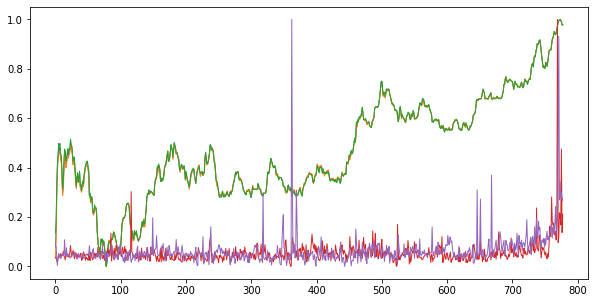

In [20]:
print(splitted_data_pooled[0])
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.plot(splitted_data_pooled[10]['MidPrice'], linewidth=1)
plt.plot(splitted_data_pooled[10]['BuyPrice'], linewidth=1)
plt.plot(splitted_data_pooled[10]['SellPrice'], linewidth=1)
plt.plot(splitted_data_pooled[10]['BuyVolume'], linewidth=1)
plt.plot(splitted_data_pooled[10]['SellVolume'], linewidth=1)

#Training (7 States)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

In [51]:
class Environment2:
    
    def __init__(self, data, history_t = 10):
        self.data = data    #State variables. 
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0

        # act = 0: sell, 
        #1: stay, 
        #2: buy
        if (self.t + 1 ==len(self.data)-1):
          act == 0
        max_holding = 10
        if act == 2:
            if len(self.positions)>=max_holding:
              reward = -1
            else:
              self.positions.append(self.data.iloc[self.t, :]['MidPrice'])
        elif act == 0: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['MidPrice'] - p)
                reward += profits
                self.profits += profits
                self.positions = []

        if len(self.positions)>=max_holding:
          reward = -1
        # set next time
        self.t += 1
        #print(self.t)
        # if self.t == 49 and self.positions != [] and act != 2:
        #   reward = -1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['MidPrice'] - p)
        self.history.pop(0)
        #self.history.append(self.data.iloc[self.t, :]['MidPrice'] - 0.5)
        self.history.append(self.data.iloc[self.t, :]['MidPrice'] - self.data.iloc[self.t-1, :]['MidPrice'])
        if (self.t==len(self.data)-1):
            self.done=True
            #self.positions = []
            #act = 2   #Force selling at end of period

        # if self.done and self.positions != []:
        #   reward = -1
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        #actual_action = act
        return [self.position_value] + self.history, reward, self.done, self.positions # obs, reward, done

In [52]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

hidden_size=20
input_size=11
output_size=3
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)


In [54]:
#epoch_num = 20
memory_size = 7780
batch_size = 778
#gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
repeat = 5

In [ ]:
master_reward = []
#start = time.time()
for epoch in range(200):
    epoch_data = splitted_data_pooled[epoch]
    print("Percentage done: ", 100*epoch/200)
    #epoch_data = pd.DataFrame(epoch_data) 
    env = Environment2(epoch_data)
    step_max = len(env.data)-1
  
    pobs = env.reset()
    step = 0
    done = False
    total_reward = 0
    total_loss = 0
    iterations = []
    log_rewards = []
    log_losses = []
    iteration = 1
    #trading_history = []
    while not done and step < step_max:
        #if done:
        #  trading_history = []  #For pair trading, make sure the stock
        # select action
        pact = np.random.randint(3)
        if np.random.rand() > epsilon:  #Epsilon greedy Exploration
            pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
            pact = np.argmax(pact.data)
            pact = pact.numpy()
        # if step == step_max - 1:
        #   pact = 2
        # act
        obs, reward, done, inventory = env.step(pact)
        #print("Step max is: ", step_max, "Inventory is: ", inventory)
        # if done is True:
        #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

        # add memory
        memory.append((pobs, pact, reward, obs, done))
        #memory.append((pobs, actual_action, reward, obs, done))
        if len(memory) > memory_size:
            memory.pop(0)

        # train or update q
        if len(memory) == memory_size:
            if total_step % train_freq == 0:
                shuffled_memory = np.random.permutation(memory)
                memory_idx = range(len(shuffled_memory))
                for i in memory_idx[::batch_size]:
                    batch = np.array(shuffled_memory[i:i+batch_size])
                    b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                    b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                    b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                    q = Q(torch.from_numpy(b_pobs))
                    q_ = Q_ast(torch.from_numpy(b_obs))
                    maxq = np.max(q_.data.numpy(),axis=1)
                    target = copy.deepcopy(q.data)
                    for j in range(batch_size):
                        target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                    Q.zero_grad()
                    loss = loss_function(q, target)
                    total_loss += loss.data.item()
                    loss.backward()
                    optimizer.step()
                    
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)
                
            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        master_reward.append(total_rewards)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            
            iterations.append(iteration)
            iteration += 1
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_rewards.append(log_reward)
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            log_losses.append(log_loss)
            #elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
            #start = time.time()

In [ ]:
#Try all sample path
samplepath_number = []
test_profits = []
actions = []
all_inventory = []
for i in range(0,len(splitted_data_pooled)):
  epoch_action = []
  inventory = []
  test_data = splitted_data_pooled[i]
  test_env = Environment2(test_data)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", i*100/len(splitted_data_pooled))
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
      inventory.append(len(epoch_inventory))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)

      pobs = obs
  epoch_action[len(test_env.data)-2] = 0
  actions.append(epoch_action)
  all_inventory.append(inventory)        
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

(array([ 1.,  4.,  6., 13., 16., 17., 28., 28., 27., 34., 38., 20.,  7.,
         4.,  4.]),
 array([-3.54468085, -2.80377273, -2.0628646 , -1.32195648, -0.58104835,
         0.15985977,  0.90076789,  1.64167602,  2.38258414,  3.12349227,
         3.86440039,  4.60530851,  5.34621664,  6.08712476,  6.82803289,
         7.56894101]),
 <a list of 15 Patch objects>)

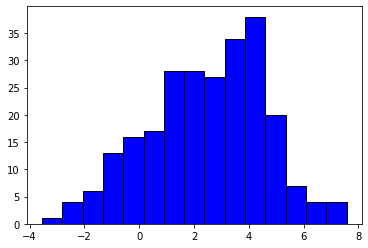

In [59]:
plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 15)

In [60]:
YEAH = 0
NOOOO = 0
for elem in test_profits:
  if elem >= 0.0:
    YEAH += 1
  else:
    NOOOO -= 1

print("Percentage of Profitting: ", YEAH*100/(len(test_profits)),"%")

Percentage of Profitting:  85.82995951417004 %


#Heat Map (7 features)

In [61]:
updated_all_inventory = all_inventory
for i in range(len(all_inventory)):
  updated_all_inventory[i].insert(0,0)
  #del updated_all_inventory[i][0]
  del updated_all_inventory[i][len(all_inventory[0])-1]
  #updated_all_inventory[i][len(all_inventory[0])-1] = 0
print(updated_all_inventory[2])
print(len(updated_all_inventory[2]))

[0, 1, 2, 0, 1, 0, 1, 2, 3, 3, 3, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 3, 3, 4, 0, 1, 2, 3, 3, 4, 5, 6, 7, 0, 1, 2, 2, 3, 4, 0, 1, 0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 7, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 3, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 2, 2, 3, 3, 4, 5, 6, 0, 1, 2, 0, 1, 2, 2, 3, 4, 5, 6, 7, 7, 7, 0, 1, 0, 1, 2, 2, 3, 4, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 6, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 0, 1, 2, 3, 4, 0, 1, 0, 1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 0, 1, 2, 3, 4, 5, 6, 6, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,

In [92]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#Begin of the day: t = 0
time_spot = 0
inventory_spot = []
price_spot = []
volume_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  #volume_spot.append(splitted_data_pooled[i]['AvgVolume'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)

# volume_quartile = []
# for i in range(len(volume_spot)):
#   if volume_spot[i] <= np.quantile(volume_spot,0.25):
#     volume_quartile.append(1)
#   elif np.quantile(volume_spot,0.25) < volume_spot[i] <= np.quantile(volume_spot,0.5):
#     volume_quartile.append(2)
#   elif np.quantile(volume_spot,0.5) < volume_spot[i] <= np.quantile(volume_spot,0.75):
#     volume_quartile.append(3)
#   elif np.quantile(volume_spot,0.75) < volume_spot[i]:
#     volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

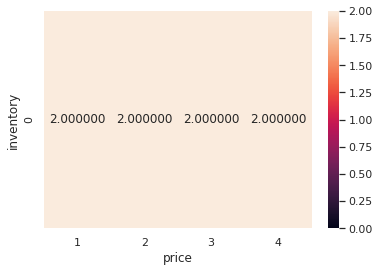

In [93]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [94]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#End of the day: t = 776
time_spot = 776
inventory_spot = []
price_spot = []
volume_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  #volume_spot.append(splitted_data_pooled[i]['AvgVolume'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)

# volume_quartile = []
# for i in range(len(volume_spot)):
#   if volume_spot[i] <= np.quantile(volume_spot,0.25):
#     volume_quartile.append(1)
#   elif np.quantile(volume_spot,0.25) < volume_spot[i] <= np.quantile(volume_spot,0.5):
#     volume_quartile.append(2)
#   elif np.quantile(volume_spot,0.5) < volume_spot[i] <= np.quantile(volume_spot,0.75):
#     volume_quartile.append(3)
#   elif np.quantile(volume_spot,0.75) < volume_spot[i]:
#     volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

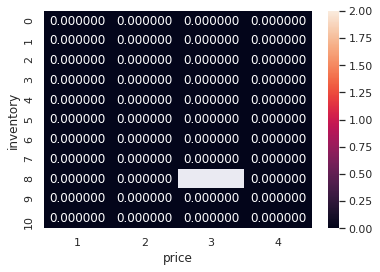

In [95]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [96]:
#Near beginning of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
volume_spot = []
for i in range(len(actions)):
  for j in range(0,50):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    #volume_spot.append(splitted_data_pooled[i]['AvgVolume'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)

data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


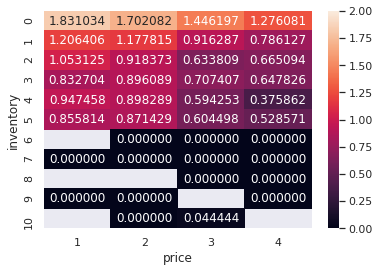

In [101]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)

#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [102]:
#Near end of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
volume_spot = []
for i in range(len(actions)):
  for j in range(720,776):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    #volume_spot.append(splitted_data_pooled[i]['AvgVolume'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)

data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


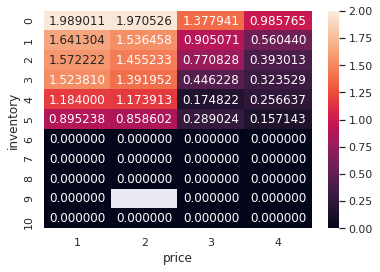

In [104]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)

#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [105]:
#middle of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
volume_spot = []
for i in range(len(actions)):
  for j in range(100,700):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    #volume_spot.append(splitted_data_pooled[i]['AvgVolume'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)

data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


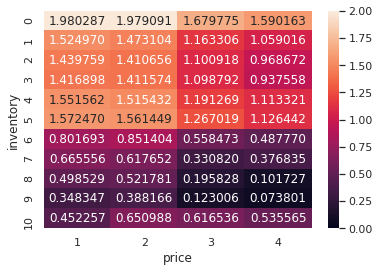

In [108]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)

#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

#Variational LSTM Autoencoder: 

Here I use variational LSTM to approximate PCA[link text](https://) to encode input time series

In [ ]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import six
from timeit import default_timer as timer


class LSTM_Var_Autoencoder(object):

    def __init__(self, intermediate_dim=None, z_dim=None, n_dim=None, kulback_coef=0.1,
                 stateful=False):
        """
        Args:
        intermediate_dim : LSTM cells dimension.
        z_dim : dimension of latent space.
        n_dim : dimension of input data.
        statefull : if true, keep cell state through batches.
        """
        
        if not intermediate_dim or not z_dim or not n_dim:
            raise ValueError("You should set intermediate_dim, z_dim"
                             "(latent space) dimension and your input"
                             "third dimension, n_dim."
                             " \n            ")

        tf.reset_default_graph()

        self.z_dim = z_dim
        self.n_dim = n_dim
        self.intermediate_dim = intermediate_dim
        self.stateful = stateful
        self.input = tf.placeholder(tf.float32, shape=[None, None, self.n_dim])
        self.batch_size = tf.placeholder(tf.int64)
        self.kulback_coef = kulback_coef
        # tf.data api
        dataset = tf.data.Dataset.from_tensor_slices(self.input).repeat() \
            .batch(self.batch_size)
        self.batch_ = tf.placeholder(tf.int32, shape=[])
        self.ite = dataset.make_initializable_iterator()
        self.x = self.ite.get_next()
        self.repeat = tf.placeholder(tf.int32)

        def gauss_sampling(mean, sigma):
            with tf.name_scope("sample_gaussian"):
                eps = tf.random_normal(tf.shape(sigma), 0, 1, dtype=tf.float32)
            # It should be log(sigma / 2), but this empirically converges"
            # much better for an unknown reason"
                z = tf.add(mean, tf.exp(0.5*sigma) * eps)
                return z

    # (with few modifications) from https://stackoverflow.com/questions

        def get_state_variables(batch_size, cell):
            # For each layer, get the initial state and make a variable out of it
            # to enable updating its value.
            state_variables = []
            for state_c, state_h in cell.zero_state(batch_size, tf.float32):
                state_variables.append(tf.nn.rnn_cell.LSTMStateTuple(
                    (state_c), (state_h)))
    # Return as a tuple, so that it can be fed to dynamic_rnn as an initial
    # state
            return tuple(state_variables)

        # Add an operation to update the train states with the last state
        # tensors
        def get_state_update_op(state_variables, new_states):
            update_ops = []
            for state_variable, new_state in zip(state_variables, new_states):
                update_ops.extend([state_variable[0] == new_state[0],
                                   state_variable[1] == new_state[1]])
            return tf.tuple(update_ops)

        # Return an operation to set each variable in a list of LSTMStateTuples
        # to zero
        def get_state_reset_op(state_variables, cell, batch_size):
            zero_states = cell.zero_state(batch_size, tf.float32)
            return get_state_update_op(state_variables, zero_states)

        weights = {
            'z_mean': tf.get_variable(
                "z_mean",
                shape=[
                    self.intermediate_dim,
                    self.z_dim],
                initializer=tf.contrib.layers.xavier_initializer()),
            'log_sigma': tf.get_variable(
                "log_sigma",
                shape=[
                    self.intermediate_dim,
                    self.z_dim],
                initializer=tf.contrib.layers.xavier_initializer())}
        biases = {
            'z_mean_b': tf.get_variable("b_mean", shape=[self.z_dim],
                                        initializer=tf.zeros_initializer()),
            'z_std_b': tf.get_variable("b_log_sigma", shape=[self.z_dim],
                                       initializer=tf.zeros_initializer())
        }

        with tf.variable_scope("encoder"):
            with tf.variable_scope("LSTM_encoder"):
                lstm_layer = tf.nn.rnn_cell.LSTMCell(
                    self.intermediate_dim,
                    forget_bias=1,
                    initializer=tf.contrib.layers.xavier_initializer(),
                    activation=tf.nn.relu)

        if self.stateful:
            self.batch_ = tf.placeholder(tf.int32, shape=[])
            # throws an error without MultiRNNCell
            layer = tf.nn.rnn_cell.MultiRNNCell([lstm_layer])
            states = get_state_variables(self.batch_, layer)
            outputs, new_states = tf.nn.dynamic_rnn(
                layer, self.x, initial_state=states, dtype=tf.float32)
            self.update_op = get_state_update_op(states, new_states)
            self.reset_state_op = get_state_reset_op(
                states, lstm_layer, self.batch_)
        else:
            outputs, _ = tf.nn.dynamic_rnn(lstm_layer, self.x, dtype="float32")

        # For each layer, get the initial state. states will be a tuple of
        # LSTMStateTuples.
        self.z_mean = tf.add(tf.matmul(
            outputs[:, -1, :], weights['z_mean']), biases['z_mean_b'])
        self.z_sigma = tf.nn.softplus(tf.add(tf.matmul(
            outputs[:, -1, :], weights['log_sigma']), biases['z_std_b']))
        self.z = gauss_sampling(self.z_mean, self.z_sigma)

        # from [batch_size,z_dim] to [batch_size, TIMESTEPS, z_dim]
        repeated_z = tf.keras.layers.RepeatVector(
            self.repeat, dtype="float32")(self.z)

        with tf.variable_scope("decoder"):
            if self.stateful:
                with tf.variable_scope('lstm_decoder_stateful'):
                    rnn_layers_ = [
                        tf.nn.rnn_cell.LSTMCell(
                            size,
                            initializer=tf.contrib.layers.xavier_initializer(),
                            forget_bias=1) for size in [
                            self.intermediate_dim,
                            n_dim]]
                    multi_rnn_cell_ = tf.nn.rnn_cell.MultiRNNCell(rnn_layers_)
                    states_ = get_state_variables(self.batch_, multi_rnn_cell_)
                self.x_reconstr_mean, new_states_ = tf.nn.dynamic_rnn(
                    cell=multi_rnn_cell_, inputs=repeated_z, initial_state=states_, dtype=tf.float32)
                self.update_op_ = get_state_update_op(states_, new_states_)
                self.reset_state_op_ = get_state_reset_op(
                    states_, multi_rnn_cell_, self.batch_)
            else:
                with tf.variable_scope('lstm_decoder_stateless'):
                    rnn_layers = [
                        tf.nn.rnn_cell.LSTMCell(
                            size,
                            initializer=tf.contrib.layers.xavier_initializer(),
                            forget_bias=1) for size in [
                            self.intermediate_dim,
                            n_dim]]
                    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(rnn_layers)
                self.x_reconstr_mean, _ = tf.nn.dynamic_rnn(
                    cell=multi_rnn_cell, inputs=repeated_z, dtype=tf.float32)

    def _create_loss_optimizer(self, opt, **param):
        with tf.name_scope("MSE"):
            reconstr_loss = tf.reduce_sum(
                tf.losses.mean_squared_error(
                    self.x, self.x_reconstr_mean))
        with tf.name_scope("KL_divergence"):
            latent_loss = - 0.5 * tf.reduce_sum(1 + self.z_sigma
                                               - self.z_mean**2
                                               - tf.exp(self.z_sigma), 1)
            self._cost = tf.reduce_mean(reconstr_loss + self.kulback_coef*latent_loss)
        # apply gradient clipping
        tvars = tf.trainable_variables()
        grads, _ = tf.clip_by_global_norm(tf.gradients(self._cost, tvars), 10)
        self.train_op = opt(**param).apply_gradients(zip(grads, tvars))

    def fit(
            self,
            X,
            learning_rate=0.001,
            batch_size=100,
            num_epochs=200,
            opt=tf.train.AdamOptimizer,
            REG_LAMBDA=0,
            grad_clip_norm=10,
            optimizer_params=None,
            verbose=True):      
        
        if len(np.shape(X)) != 3:
            raise ValueError(
                'Input must be a 3-D array. I could reshape it for you, but I am too lazy.'
                ' \n            Use input.reshape(-1,timesteps,1).')
        if optimizer_params is None:
            optimizer_params = {}
            optimizer_params['learning_rate'] = learning_rate
        else:
            optimizer_params = dict(six.iteritems(optimizer_params))

        self._create_loss_optimizer(opt, **optimizer_params)
        lstm_var = tf.get_collection(
            tf.GraphKeys.TRAINABLE_VARIABLES,
            scope='LSTM_encoder')
        self._cost += REG_LAMBDA * tf.reduce_mean(tf.nn.l2_loss(lstm_var))

        config = tf.ConfigProto(allow_soft_placement=True)
        config.gpu_options.allow_growth = True

        self.sess = tf.Session(config=config)
        init = tf.global_variables_initializer()
        self.sess.run(init)
        self.sess.run(
            self.ite.initializer,
            feed_dict={
                self.input: X,
                self.batch_size: batch_size})
        batches_per_epoch = int(np.ceil(len(X) / batch_size))

        print("\n")
        print("Training...")
        print("\n")
        start = timer()

        for epoch in range(num_epochs):
            train_error = 0
            for step in range(batches_per_epoch):
                if self.stateful:
                    loss, _, s, _ = self.sess.run([self._cost, self.train_op, self.update_op, self.update_op_],
                                                  feed_dict={self.repeat: np.shape(X)[1], self.batch_: batch_size})
                else:
                    loss, _ = self.sess.run([self._cost, self.train_op], feed_dict={
                                            self.repeat: np.shape(X)[1]})
                train_error += loss
            if step == (batches_per_epoch - 1):
                mean_loss = train_error / batches_per_epoch

                if self.stateful:  # reset cell & hidden states between epochs
                    self.sess.run([self.reset_state_op],
                                  feed_dict={self.batch_: batch_size})
                    self.sess.run([self.reset_state_op_],
                                  feed_dict={self.batch_: batch_size})
            if epoch % 10 == 0 & verbose:
                print(
                    "Epoch {:^6} Loss {:0.5f}"  .format(
                        epoch + 1, mean_loss))
        end = timer()
        print("\n")
        print("Training time {:0.2f} minutes".format((end - start) / (60)))

    def reconstruct(self, X, get_error=False):
        self.sess.run(
            self.ite.initializer,
            feed_dict={
                self.input: X,
                self.batch_size: np.shape(X)[0]})
        if self.stateful:
            _, _ = self.sess.run([self.reset_state_op, self.reset_state_op_], feed_dict={
                                 self.batch_: np.shape(X)[0]})
            x_rec, _, _ = self.sess.run([self.x_reconstr_mean, self.update_op, self.update_op_], feed_dict={
                                        self.batch_: np.shape(X)[0], self.repeat: np.shape(X)[1]})
        else:
            x_rec = self.sess.run(self.x_reconstr_mean,
                                  feed_dict={self.repeat: np.shape(X)[1]})
        if get_error:
            squared_error = (x_rec - X)**2
            return x_rec, squared_error
        else:
            return x_rec

    def reduce(self, X):
        self.sess.run(
            self.ite.initializer,
            feed_dict={
                self.input: X,
                self.batch_size: np.shape(X)[0]})
        if self.stateful:
            _ = self.sess.run([self.reset_state_op], feed_dict={
                              self.batch_: np.shape(X)[0]})
            x, _ = self.sess.run([self.z, self.update_op], feed_dict={
                                 self.batch_: np.shape(X)[0], self.repeat: np.shape(X)[1]})
        else:
            x = self.sess.run(self.z)
        return x

In [ ]:
from LstmVAE import LSTM_Var_Autoencoder
from LstmVAE import preprocess

preprocess(df) #return normalized df, check NaN values replacing it with 0

df = df.reshape(-1,timesteps,n_dim) #use 3D input, n_dim = 1 for 1D time series. 

vae = LSTM_Var_Autoencoder(intermediate_dim = 15,z_dim = 3, n_dim=1, stateful = True) #default stateful = False

vae.fit(df, learning_rate=0.001, batch_size = 100, num_epochs = 200, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01,
            grad_clip_norm=10, optimizer_params=None, verbose = True)

"""REG_LAMBDA is the L2 loss lambda coefficient, should be set to 0 if not desired.
   optimizer_param : pass a dict = {}
"""

x_reconstructed, recons_error = vae.reconstruct(df, get_error = True) #returns squared error

x_reduced = vae.reduce(df) #latent space representation

#Data Processing (New State)

In [231]:
import pandas as pd
data = {'Time': timestamp, 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'AvgVolume': flattened_AvgVolume,
        'MidPrice': flattened_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  
  pooled_MidPrice = []
  pooled_timestamp = []
  pooled_AvgVolume = []
  for i in range(int(len(temp)/pooling_factor)-1):
    
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_AvgVolume.append(np.mean(list(df['AvgVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': pooled_BuyVolume,
        # 'SellVolume': pooled_SellVolume,
        'AvgVolume': pooled_AvgVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):
  result_price = []
  result_volume = []
  max_price = np.max(list(df['MidPrice']))
  min_price = np.min(list(df['MidPrice']))
  max_volume = np.max(list(df['AvgVolume']))
  min_volume = np.min(list(df['AvgVolume']))
  for elem in list(df['MidPrice']):
    result_price.append((elem - min_price)/(max_price-min_price))
  for elem in list(df['AvgVolume']):
    result_volume.append((elem - min_volume)/(max_volume-min_volume))
  new_df = {'Time': list(df['Time']), 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'AvgVolume': result_volume,
        'MidPrice': result_price}
  data = pd.DataFrame(new_df) 
  return data

          Time  AvgVolume  MidPrice
0            0      350.0     0.000
1            1       57.0    -0.005
2            2       57.0     0.000
3            3      165.0     0.115
4            4      165.0     0.140
...        ...        ...       ...
5802947  23394     3580.5    -0.015
5802948  23395     1760.0    -0.015
5802949  23396     9384.0    -0.015
5802950  23397    11703.5    -0.015
5802951  23398    15861.0    -0.005

[5802952 rows x 3 columns]


In [ ]:
splitted_data = split_into_days(data,timestamp)
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

#Training (New State)

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

     Time  AvgVolume  MidPrice
0       0   0.030646  0.943756
1       1   0.059647  0.831447
2       2   0.026118  0.852471
3       3   0.016059  0.854807
4       4   0.032044  0.874394
..    ...        ...       ...
773   773   0.380400  0.696855
774   774   0.321390  0.716442
775   775   0.806899  0.696496
776   776   0.605211  0.668284
777   777   1.000000  0.652471

[778 rows x 3 columns]


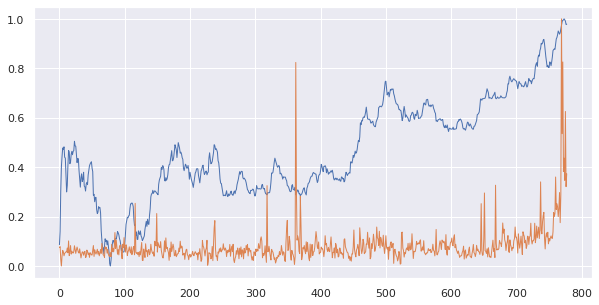

In [235]:
print(splitted_data_pooled[0])
fig = plt.figure(figsize=(10,5))

plt.plot(splitted_data_pooled[10]['MidPrice'], linewidth=1)
plt.plot(splitted_data_pooled[10]['AvgVolume'], linewidth=1)

In [236]:
class Environment2:
    
    def __init__(self, data, history_t = 10):
        self.data = data    #State variables. 
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0

        # act = 0: sell, 
        #1: stay, 
        #2: buy
        if (self.t + 1 ==len(self.data)-1):
          act == 0
        max_holding = 10
        if act == 2:
            if len(self.positions)>=max_holding:
              reward = -1
            else:
              self.positions.append(self.data.iloc[self.t, :]['MidPrice'])
        elif act == 0: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['MidPrice'] - p)
                reward += profits
                self.profits += profits
                self.positions = []

        if len(self.positions)>=max_holding:
          reward = -1
        # set next time
        self.t += 1
        #print(self.t)
        # if self.t == 49 and self.positions != [] and act != 2:
        #   reward = -1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['MidPrice'] - p)
        self.history.pop(0)
        #self.history.append(self.data.iloc[self.t, :]['MidPrice'] - 0.5)
        self.history.append(self.data.iloc[self.t, :]['MidPrice'] - self.data.iloc[self.t-1, :]['MidPrice'])
        if (self.t==len(self.data)-1):
            self.done=True
            #self.positions = []
            #act = 2   #Force selling at end of period

        # if self.done and self.positions != []:
        #   reward = -1
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        #actual_action = act
        return [self.position_value] + self.history, reward, self.done, self.positions # obs, reward, done

In [237]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

hidden_size=20
input_size=11
output_size=3
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)


In [238]:
#epoch_num = 20
memory_size = 7780
batch_size = 778
#gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
repeat = 5

In [ ]:
print(train_data.iloc[0:23400])

In [ ]:
master_reward = []
#start = time.time()
for epoch in range(200):
    epoch_data = splitted_data_pooled[epoch]
    print("Percentage done: ", 100*epoch/200)
    #epoch_data = pd.DataFrame(epoch_data) 
    env = Environment2(epoch_data)
    step_max = len(env.data)-1
  
    pobs = env.reset()
    step = 0
    done = False
    total_reward = 0
    total_loss = 0
    iterations = []
    log_rewards = []
    log_losses = []
    iteration = 1
    #trading_history = []
    while not done and step < step_max:
        #if done:
        #  trading_history = []  #For pair trading, make sure the stock
        # select action
        pact = np.random.randint(3)
        if np.random.rand() > epsilon:  #Epsilon greedy Exploration
            pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
            pact = np.argmax(pact.data)
            pact = pact.numpy()
        # if step == step_max - 1:
        #   pact = 2
        # act
        obs, reward, done, inventory = env.step(pact)
        #print("Step max is: ", step_max, "Inventory is: ", inventory)
        # if done is True:
        #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

        # add memory
        memory.append((pobs, pact, reward, obs, done))
        #memory.append((pobs, actual_action, reward, obs, done))
        if len(memory) > memory_size:
            memory.pop(0)

        # train or update q
        if len(memory) == memory_size:
            if total_step % train_freq == 0:
                shuffled_memory = np.random.permutation(memory)
                memory_idx = range(len(shuffled_memory))
                for i in memory_idx[::batch_size]:
                    batch = np.array(shuffled_memory[i:i+batch_size])
                    b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                    b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                    b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                    q = Q(torch.from_numpy(b_pobs))
                    q_ = Q_ast(torch.from_numpy(b_obs))
                    maxq = np.max(q_.data.numpy(),axis=1)
                    target = copy.deepcopy(q.data)
                    for j in range(batch_size):
                        target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                    Q.zero_grad()
                    loss = loss_function(q, target)
                    total_loss += loss.data.item()
                    loss.backward()
                    optimizer.step()
                    
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)
                
            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        master_reward.append(total_rewards)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            
            iterations.append(iteration)
            iteration += 1
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_rewards.append(log_reward)
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            log_losses.append(log_loss)
            #elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
            #start = time.time()

In [ ]:
#Try all sample path
samplepath_number = []
test_profits = []
actions = []
all_inventory = []
for i in range(0,len(splitted_data_pooled)):
  epoch_action = []
  inventory = []
  test_data = splitted_data_pooled[i]
  test_env = Environment2(test_data)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", i*100/len(splitted_data_pooled))
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
      inventory.append(len(epoch_inventory))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)

      pobs = obs
  epoch_action[len(test_env.data)-2] = 0
  actions.append(epoch_action)
  all_inventory.append(inventory)        
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

(array([ 1.,  0.,  8.,  7., 24., 29., 27., 28., 16., 26., 26., 20., 17.,
        13.,  5.]),
 array([-1.05779205, -0.80469521, -0.55159837, -0.29850152, -0.04540468,
         0.20769216,  0.460789  ,  0.71388584,  0.96698268,  1.22007952,
         1.47317636,  1.7262732 ,  1.97937004,  2.23246688,  2.48556373,
         2.73866057]),
 <a list of 15 Patch objects>)

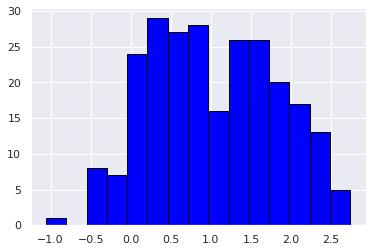

In [242]:
plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 15)

In [243]:
YEAH = 0
NOOOO = 0
for elem in test_profits:
  if elem >= 0.0:
    YEAH += 1
  else:
    NOOOO -= 1

print("Percentage of Profitting: ", YEAH*100/(len(test_profits)),"%")

Percentage of Profitting:  93.11740890688259 %


#Heat Map (With new state)

In [244]:
updated_all_inventory = all_inventory
for i in range(len(all_inventory)):
  updated_all_inventory[i].insert(0,0)
  #del updated_all_inventory[i][0]
  del updated_all_inventory[i][len(all_inventory[0])-1]
  #updated_all_inventory[i][len(all_inventory[0])-1] = 0
print(updated_all_inventory[2])
print(len(updated_all_inventory[2]))

[0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 3, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

In [245]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#Begin of the day: t = 0
time_spot = 0
inventory_spot = []
price_spot = []
volume_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  volume_spot.append(splitted_data_pooled[i]['AvgVolume'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)

volume_quartile = []
for i in range(len(volume_spot)):
  if volume_spot[i] <= np.quantile(volume_spot,0.25):
    volume_quartile.append(1)
  elif np.quantile(volume_spot,0.25) < volume_spot[i] <= np.quantile(volume_spot,0.5):
    volume_quartile.append(2)
  elif np.quantile(volume_spot,0.5) < volume_spot[i] <= np.quantile(volume_spot,0.75):
    volume_quartile.append(3)
  elif np.quantile(volume_spot,0.75) < volume_spot[i]:
    volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot,volume_quartile])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action','volume'])

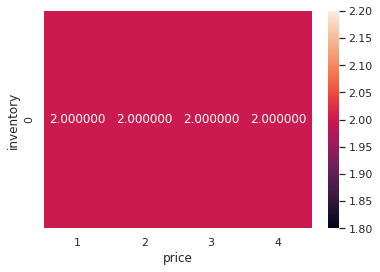

In [247]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [249]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#Begin of the day: t = 0
time_spot = 776
inventory_spot = []
price_spot = []
volume_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  volume_spot.append(splitted_data_pooled[i]['AvgVolume'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)

volume_quartile = []
for i in range(len(volume_spot)):
  if volume_spot[i] <= np.quantile(volume_spot,0.25):
    volume_quartile.append(1)
  elif np.quantile(volume_spot,0.25) < volume_spot[i] <= np.quantile(volume_spot,0.5):
    volume_quartile.append(2)
  elif np.quantile(volume_spot,0.5) < volume_spot[i] <= np.quantile(volume_spot,0.75):
    volume_quartile.append(3)
  elif np.quantile(volume_spot,0.75) < volume_spot[i]:
    volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot,volume_quartile])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action','volume'])

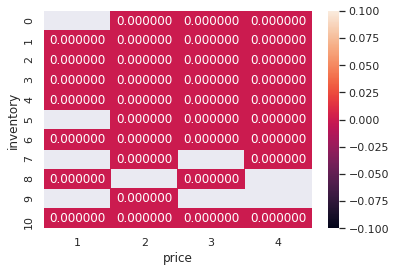

In [250]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [276]:
#Near beginning of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
volume_spot = []
for i in range(len(actions)):
  for j in range(0,50):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    volume_spot.append(splitted_data_pooled[i]['AvgVolume'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)

first_quantile_volume = np.quantile(volume_spot,0.1)
second_quantile_volume = np.quantile(volume_spot,0.5)
third_quantile_volume = np.quantile(volume_spot,0.9)
volume_quartile = []
for i in range(len(volume_spot)):
  if volume_spot[i] <= first_quantile_volume:
    volume_quartile.append(1)
  elif first_quantile_volume < volume_spot[i] <= second_quantile_volume:
    volume_quartile.append(2)
  elif second_quantile_volume < volume_spot[i] <= third_quantile_volume:
    volume_quartile.append(3)
  elif third_quantile_volume < volume_spot[i]:
    volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot,volume_quartile])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action','volume'])

Loaded
Done


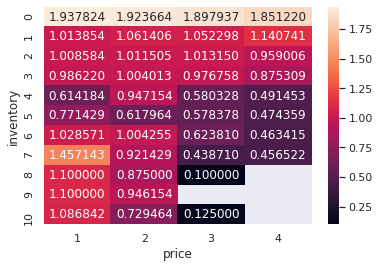

In [297]:
#df = sns.load_dataset("flights")

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")



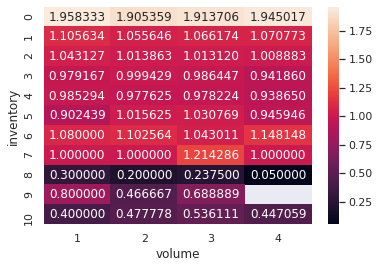

In [295]:
table1 = pd.pivot_table(df, values='action', index=['inventory'], columns = ['volume'],
                     aggfunc=np.mean)

ax = sns.heatmap(table1, annot=True, fmt="f")

In [327]:
#Near end of the day: t = 720 to t = 776
inventory_spot = []
price_spot = []
action_spot = []
volume_spot = []
for i in range(len(actions)):
  for j in range(720,776):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    volume_spot.append(splitted_data_pooled[i]['AvgVolume'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)

first_quantile_volume = np.quantile(volume_spot,0.1)
second_quantile_volume = np.quantile(volume_spot,0.5)
third_quantile_volume = np.quantile(volume_spot,0.9)
volume_quartile = []
for i in range(len(volume_spot)):
  if volume_spot[i] <= first_quantile_volume:
    volume_quartile.append(1)
  elif first_quantile_volume < volume_spot[i] <= second_quantile_volume:
    volume_quartile.append(2)
  elif second_quantile_volume < volume_spot[i] <= third_quantile_volume:
    volume_quartile.append(3)
  elif third_quantile_volume < volume_spot[i]:
    volume_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot,volume_quartile])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action','volume'])

Loaded
Done


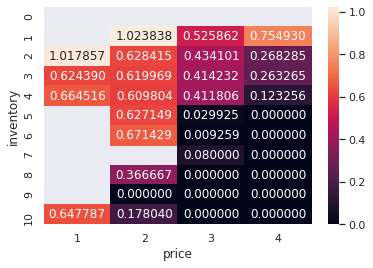

In [345]:
#df = sns.load_dataset("flights")

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)

ax = sns.heatmap(table, annot=True, fmt="f")



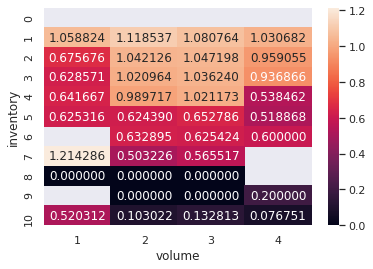

In [348]:
table1 = pd.pivot_table(df, values='action', index=['inventory'], columns = ['volume'],
                     aggfunc=np.mean)
#print(table)

ax = sns.heatmap(table1, annot=True, fmt="f")

#Data Processing (Old State)

In [75]:
import pandas as pd
data = {'Time': timestamp, 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'MidPrice': flattened_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

          Time  MidPrice
0            0     0.000
1            1    -0.005
2            2     0.000
3            3     0.115
4            4     0.140
...        ...       ...
5802947  23394    -0.015
5802948  23395    -0.015
5802949  23396    -0.015
5802950  23397    -0.015
5802951  23398    -0.005

[5802952 rows x 2 columns]


In [76]:
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  
  pooled_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': pooled_BuyVolume,
        # 'SellVolume': pooled_SellVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):
  result = []
  max = np.max(list(df['MidPrice']))
  min = np.min(list(df['MidPrice']))
  for elem in list(df['MidPrice']):
    result.append((elem - min)/(max-min))
  new_df = {'Time': list(df['Time']), 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'MidPrice': result}
  data = pd.DataFrame(new_df) 
  return data

In [77]:
splitted_data = split_into_days(data,timestamp)

In [78]:
print(splitted_data[0])

        Time  MidPrice
0          0     0.000
1          1    -0.005
2          2     0.000
3          3     0.115
4          4     0.140
...      ...       ...
23394  23394    -0.195
23395  23395    -0.205
23396  23396    -0.205
23397  23397    -0.225
23398  23398    -0.225

[23399 rows x 2 columns]


In [ ]:
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

#Training (Old State)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

     Time  MidPrice
0       0  0.943756
1       1  0.831447
2       2  0.852471
3       3  0.854807
4       4  0.874394
..    ...       ...
773   773  0.696855
774   774  0.716442
775   775  0.696496
776   776  0.668284
777   777  0.652471

[778 rows x 2 columns]


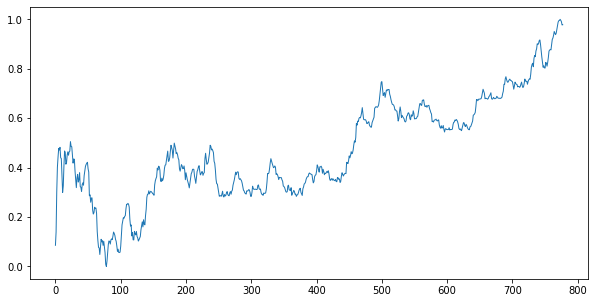

In [86]:
print(splitted_data_pooled[0])
fig = plt.figure(figsize=(10,5))

plt.plot(splitted_data_pooled[10]['MidPrice'], linewidth=1)


In [82]:
class Environment2:
    
    def __init__(self, data, history_t = 10):
        self.data = data    #State variables. 
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0

        # act = 0: sell, 
        #1: stay, 
        #2: buy
        if (self.t + 1 ==len(self.data)-1):
          act == 0
        max_holding = 10
        if act == 2:
            if len(self.positions)>=max_holding:
              reward = -1
            else:
              self.positions.append(self.data.iloc[self.t, :]['MidPrice'])
        elif act == 0: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['MidPrice'] - p)
                reward += profits
                self.profits += profits
                self.positions = []

        if len(self.positions)>=max_holding:
          reward = -1
        # set next time
        self.t += 1
        #print(self.t)
        # if self.t == 49 and self.positions != [] and act != 2:
        #   reward = -1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['MidPrice'] - p)
        self.history.pop(0)
        #self.history.append(self.data.iloc[self.t, :]['MidPrice'] - 0.5)
        self.history.append(self.data.iloc[self.t, :]['MidPrice'] - self.data.iloc[self.t-1, :]['MidPrice'])
        if (self.t==len(self.data)-1):
            self.done=True
            #self.positions = []
            #act = 2   #Force selling at end of period

        # if self.done and self.positions != []:
        #   reward = -1
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        #actual_action = act
        return [self.position_value] + self.history, reward, self.done, self.positions # obs, reward, done

In [83]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

hidden_size=20
input_size=11
output_size=3
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)


In [89]:
#epoch_num = 20
memory_size = 7780
batch_size = 778
#gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
repeat = 5

In [ ]:
master_reward = []
#start = time.time()
for epoch in range(200):
    epoch_data = splitted_data_pooled[epoch]
    print("Percentage done: ", 100*epoch/200)
    #epoch_data = pd.DataFrame(epoch_data) 
    env = Environment2(epoch_data)
    step_max = len(env.data)-1
  
    pobs = env.reset()
    step = 0
    done = False
    total_reward = 0
    total_loss = 0
    iterations = []
    log_rewards = []
    log_losses = []
    iteration = 1
    #trading_history = []
    while not done and step < step_max:
        #if done:
        #  trading_history = []  #For pair trading, make sure the stock
        # select action
        pact = np.random.randint(3)
        if np.random.rand() > epsilon:  #Epsilon greedy Exploration
            pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
            pact = np.argmax(pact.data)
            pact = pact.numpy()
        # if step == step_max - 1:
        #   pact = 2
        # act
        obs, reward, done, inventory = env.step(pact)
        #print("Step max is: ", step_max, "Inventory is: ", inventory)
        # if done is True:
        #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

        # add memory
        memory.append((pobs, pact, reward, obs, done))
        #memory.append((pobs, actual_action, reward, obs, done))
        if len(memory) > memory_size:
            memory.pop(0)

        # train or update q
        if len(memory) == memory_size:
            if total_step % train_freq == 0:
                shuffled_memory = np.random.permutation(memory)
                memory_idx = range(len(shuffled_memory))
                for i in memory_idx[::batch_size]:
                    batch = np.array(shuffled_memory[i:i+batch_size])
                    b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                    b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                    b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                    q = Q(torch.from_numpy(b_pobs))
                    q_ = Q_ast(torch.from_numpy(b_obs))
                    maxq = np.max(q_.data.numpy(),axis=1)
                    target = copy.deepcopy(q.data)
                    for j in range(batch_size):
                        target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                    Q.zero_grad()
                    loss = loss_function(q, target)
                    total_loss += loss.data.item()
                    loss.backward()
                    optimizer.step()
                    
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)
                
            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        master_reward.append(total_rewards)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            
            iterations.append(iteration)
            iteration += 1
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_rewards.append(log_reward)
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            log_losses.append(log_loss)
            #elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
            #start = time.time()

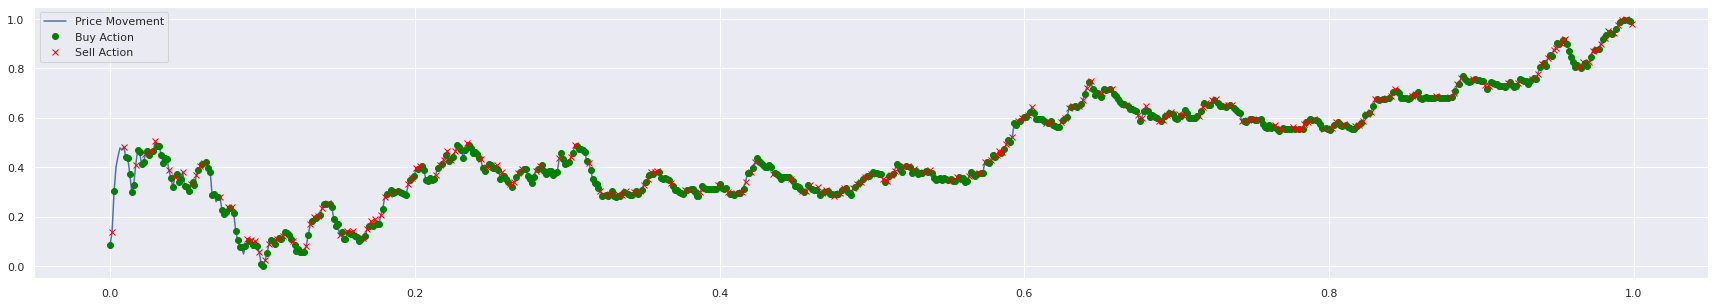

In [216]:
to_test = 10
test_data = splitted_data_pooled[to_test]
test_env = Environment2(test_data)

#test_env = Environment1(X[100])
pobs = test_env.reset()
test_acts = []
test_rewards = []
inventory = []
for _ in range(len(test_env.data)-1):
    
    pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
    pact = np.argmax(pact.data)
    
    #print(pact.numpy())        
    obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
    inventory.append(len(epoch_inventory))
    test_acts.append(pact.numpy())
    test_rewards.append(reward)

    pobs = obs
test_acts[len(test_env.data)-2] = 0
        
test_profits = test_env.profits

buy_point = []
buy_time = []
sell_point = []
sell_time = []
t = []
for i in range(len(test_acts)):
  t.append(i/len(test_acts))
  if test_acts[i] == 2:
    buy_point.append(splitted_data_pooled[to_test]['MidPrice'].iloc[i])
    buy_time.append(i/len(test_acts))
  if test_acts[i] == 0:
    sell_point.append(splitted_data_pooled[to_test]['MidPrice'].iloc[i])
    sell_time.append(i/len(test_acts))

fig = plt.figure(figsize=(30,5))
plt.plot(t,splitted_data_pooled[to_test]['MidPrice'].iloc[:-1])
plt.plot(buy_time, buy_point, 'o', color='green')
plt.plot(sell_time, sell_point, 'x', color='red');
plt.legend(["Price Movement","Buy Action","Sell Action"])
#print(mark)
plt.show()




In [117]:
print(test_profits)

-2.7319721980886245


In [ ]:
#Try all sample path
samplepath_number = []
test_profits = []
actions = []
all_inventory = []
for i in range(0,len(splitted_data_pooled)):
  epoch_action = []
  inventory = []
  test_data = splitted_data_pooled[i]
  test_env = Environment2(test_data)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", i*100/len(splitted_data_pooled))
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
      inventory.append(len(epoch_inventory))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)

      pobs = obs
  epoch_action[len(test_env.data)-2] = 0
  actions.append(epoch_action)
  all_inventory.append(inventory)        
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

(array([ 4.,  8., 16., 17., 23., 33., 35., 29., 40., 20.,  8.,  8.,  3.,
         1.,  2.]),
 array([-1.44129236, -0.93321978, -0.42514719,  0.08292539,  0.59099797,
         1.09907055,  1.60714313,  2.11521571,  2.62328829,  3.13136087,
         3.63943345,  4.14750603,  4.65557861,  5.16365119,  5.67172378,
         6.17979636]),
 <a list of 15 Patch objects>)

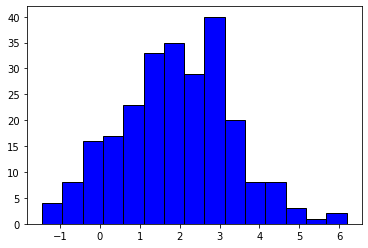

In [129]:
plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 15)

In [125]:
YEAH = 0
NOOOO = 0
for elem in test_profits:
  if elem >= 0.0:
    YEAH += 1
  else:
    NOOOO -= 1

print("Percentage of Profitting: ", YEAH*100/(len(test_profits)),"%")

Percentage of Profitting:  89.06882591093117 %


#Heat Map (Old State)

In [ ]:
updated_all_inventory = all_inventory
for i in range(len(all_inventory)):
  updated_all_inventory[i].insert(0,0)
  #del updated_all_inventory[i][0]
  del updated_all_inventory[i][len(all_inventory[0])-1]
  #updated_all_inventory[i][len(all_inventory[0])-1] = 0
print(updated_all_inventory[2])
print(len(updated_all_inventory[2]))

In [146]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#Begin of the day: t = 0
time_spot = 0
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

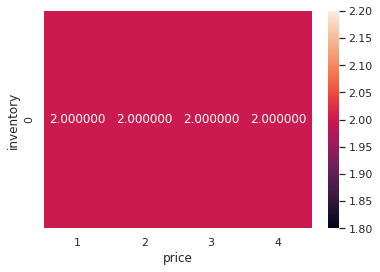

In [147]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [148]:
#End of the day: t = 776
time_spot = 776
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

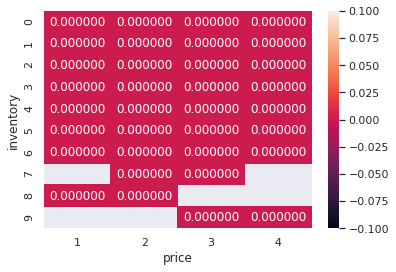

In [149]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [211]:
#Near end of the day: t = 720 to t = 776
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(720,776):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


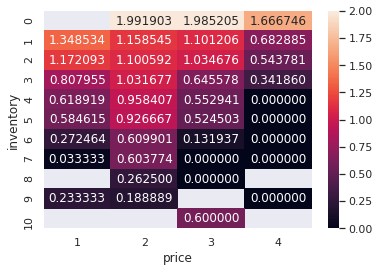

In [213]:

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)


#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [214]:
#Near beginning of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(0,50):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


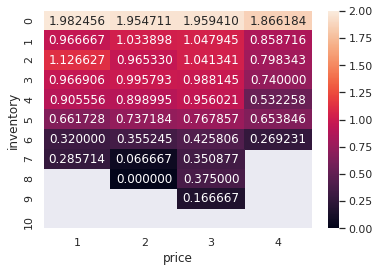

In [215]:

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)

#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [161]:
#Middle of the day: t = 300 to t = 500
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(300,500):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


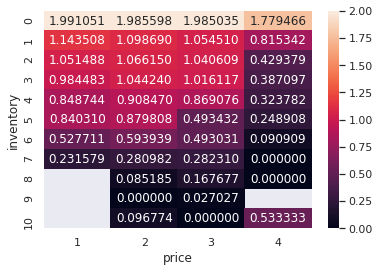

In [195]:
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                      aggfunc=np.mean)


#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)